# Data analysis, data visualization and prediction of Covid-19 cases in India using SARIMAX 

## Analysis and visualization of total confirmed cases, active cases, deaths due to covid-19 in respective States/UTs


In [38]:
import pandas as pd
import numpy as np

import cufflinks as cf
cf.go_offline()
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Dataset : Multiple CSVs including data of daily updates and states wise cases
https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset?select=nation_level_daily.csv ( Till 26th May 2020)

Credits : 

Data from India Health Ministry Website: https://www.mohfw.gov.in/ 

COVID-19 tracker dashboard https://www.covid19india.org/

In [2]:
india_covid_dataset = pd.read_csv('F:\Online_Courses\datasets\covid_19_india\datasets_549966_1189152_complete.csv',parse_dates=['Date'])
covid_df = pd.DataFrame(india_covid_dataset)
covid_df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [3]:
daily_covid = pd.read_csv('F:\Online_Courses\datasets\covid_19_india\datasets_549966_1189152_nation_level_daily.csv')
daily_df = pd.DataFrame(daily_covid)
daily_df.tail()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
112,21 May,118223,3583,48553,6023,148,3131
113,22 May,124759,3725,51833,6536,142,3280
114,23 May,131422,3867,54409,6665,142,2576
115,24 May,138535,4023,57694,7111,156,3285
116,25 May,144949,4173,60706,6414,150,3012


In [5]:
state_level= pd.read_csv('F:\Online_Courses\datasets\covid_19_india\datasets_549966_1189152_state_level_latest.csv')
state_df = pd.DataFrame(state_level)
state_df.head()

,state,statecode,lastupdatedtime,confirmed,active,deaths,recovered,deltaconfirmed,deltadeaths,deltarecovered,statenotes
0,Total,TT,26/05/2020 18:22:03,146498,81071,4188,61228,1548,14,522,NaN
1,Maharashtra,MH,26/05/2020 09:24:03,52667,35186,1695,15786,0,0,0,NaN
2,Tamil Nadu,TN,25/05/2020 19:22:04,17082,8232,119,8731,0,0,0,NaN
3,Gujarat,GJ,25/05/2020 21:33:04,14468,6944,888,6636,0,0,0,NaN
4,Delhi,DL,26/05/2020 14:42:04,14465,7223,288,6954,412,12,183,[10-May]<br>\n\nDelhi will be releasing bullet...


In [6]:
final_state_df = state_df.drop([0])

In [7]:
confirm = final_state_df['confirmed'].values.sum()

In [8]:
new_df = df2.groupby('State/UnionTerritory').sum()

## Total number of Confirmed cases, Active cases, Recovered cases, Deaths in India

In [10]:
print(f'Total number of Confirmed COVID 2019 cases across India:', confirm)
print(f'Total number of Active COVID 2019 cases across India:', final_state_df['active'].sum())
print(f'Total number of recovered COVID 2019 cases across India:', final_state_df['recovered'].sum())
print(f'Total number of Deaths due to COVID 2019  across India:', final_state_df['deaths'].sum())
print(f'Total number of States/UTs affected:', final_state_df['state'].nunique())

Total number of Confirmed COVID 2019 cases across India: 146498
Total number of Active COVID 2019 cases across India: 81071
Total number of recovered COVID 2019 cases across India: 61228
Total number of Deaths due to COVID 2019  across India: 4188
Total number of States/UTs affected: 37


## Analysis and visualization of active cases in states/UTs

In [11]:
state_active = final_state_df.groupby('state')['active'].sum().sort_values(ascending=False).to_frame()
state_active.style.background_gradient(cmap='Reds')

,active
state,
Maharashtra,35186
Tamil Nadu,8232
Delhi,7223
Gujarat,6944
Rajasthan,3144
Madhya Pradesh,2988
State Unassigned,2970
Uttar Pradesh,2668
West Bengal,2124


In [12]:
state_active_df = final_state_df.groupby('state')['active'].sum().sort_values(ascending=True).reset_index()

In [13]:
data = px.data.gapminder()

fig = px.bar(state_active_df, x='active', y='state',title='Total Active Cases', 
             text='active', 
             orientation='h', 
             height=1000,
             color='active',
             range_x = [0, max(state_active_df['active'])]
            )                                                
fig.show()

## Comparison of confimed cases and active cases

In [14]:
state_conf_active = final_state_df.groupby('state')['active','confirmed,'deaths'].sum().sort_values(ascending=True,by='active').reset_index()


fig = go.Figure(data=[
    go.Bar(name='Confirmed', y=final_state_df['confirmed'], x=final_state_df['state']),
    go.Bar(name='Active', y=final_state_df['active'], x=final_state_df['state'])
])
# Change the bar mode
fig.update_layout(barmode='group',title = 'Comparision of confimed VS Active cases')
fig.show()

## Handling Data for timeseries analysis using SARIMAX

In [15]:
daily_df['date'] = pd.date_range(start= '2020-01-30', end = '2020-05-25', freq='D')

In [16]:
daily_df.head()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
0,2020-01-30,1,0,0,1,0,0
1,2020-01-31,1,0,0,0,0,0
2,2020-02-01,1,0,0,0,0,0
3,2020-02-02,2,0,0,1,0,0
4,2020-02-03,3,0,0,1,0,0


In [17]:
new_daily  = daily_df.copy()
new_daily = new_daily.set_index('date')
new_daily.head()

,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
date,,,,,,
2020-01-30,1,0,0,1,0,0
2020-01-31,1,0,0,0,0,0
2020-02-01,1,0,0,0,0,0
2020-02-02,2,0,0,1,0,0
2020-02-03,3,0,0,1,0,0


## Trend of total number of cases in India on daily basis from the 30th january 

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=new_daily.index, y=new_daily['totalconfirmed'],
                    mode='lines+markers',name='Total Cases'))

fig.add_trace(go.Scatter(x=new_daily.index, y=new_daily['dailyconfirmed'], 
                mode='lines',name='New Cases'))
fig.add_trace(go.Scatter(x=new_daily.index, y=new_daily['dailyrecovered'], 
                mode='lines',name='Daily recovered'))
        
    
fig.update_layout(title_text='Trend of Coronavirus Cases on daily basis')

fig.show()

## Calculating Auto correlation and partial auto correlation of total confirmed cases

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

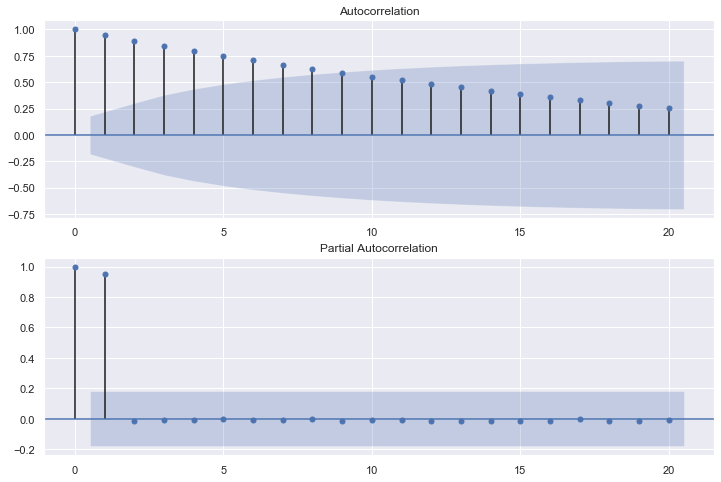

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf( new_daily['totalconfirmed'].values.squeeze(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_daily['totalconfirmed'], lags=20, ax=ax2)

## Train SARIMAX model on "total confirmed" cases

In [36]:
def gridSearch(itemObj):
    # Define the p, d and q parameters to take any value between 0 and 3
    p = d = q = range(1, 5)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

    bestAIC = np.inf
    bestParam = None
    bestSParam = None
    
    print('Running GridSearch')
    
    #use gridsearch to look for optimial arima parameters
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(itemObj,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                #if current run of AIC is better than the best one so far, overwrite it
                if results.aic<bestAIC:
                    if results.aic >= 1:
                        bestAIC = results.aic
                        bestParam = param
                        bestSParam = param_seasonal

            except:
                continue
                
    print('the best ones are:',bestAIC,bestParam,bestSParam)
    return bestAIC,bestParam,bestSParam

In [37]:
import warnings
warnings.filterwarnings("ignore")

bestAIC,bestParam,bestSParam = gridSearch(new_daily['totalconfirmed'])
# bestAIC = 94036.38
# order = (2,1,2)
# seasonal_order = (2,1,2,12)
mod = sm.tsa.statespace.SARIMAX(new_daily['totalconfirmed'],
                                    order=bestParam,
                                    seasonal_order=bestSParam,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

results = mod.fit()
print(results.summary())

Running GridSearch
the best ones are: 1243.918906652442 (1, 2, 3) (2, 3, 4, 4)
                                          SARIMAX Results                                           
Dep. Variable:                               totalconfirmed   No. Observations:                  117
Model:             SARIMAX(1, 2, 3)x(2, 3, [1, 2, 3, 4], 4)   Log Likelihood                -610.959
Date:                                      Wed, 27 May 2020   AIC                           1243.919
Time:                                              22:51:42   BIC                           1270.526
Sample:                                          01-30-2020   HQIC                          1254.608
                                               - 05-25-2020                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [39]:
print(bestAIC,bestParam,bestSParam)

bestAIC = bestAIC
order = bestParam
seasonal_order = bestSParam

1243.918906652442 (1, 2, 3) (2, 3, 4, 4)


## Prediction for next 20 days.

In [52]:
forecast = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = forecast.conf_int()

forecast_df = pd.DataFrame(forecast.predicted_mean,columns=['Predicted Confirmed cases'])

forecast_plot = pd.concat([new_daily['totalconfirmed'],forecast_df,pred_ci])


layout = go.Layout(title = "Prediction of covid-2019 for next 20 days",
     xaxis=dict(title='Date'),
     yaxis=dict(title="Total confirmed cases"))
fig = forecast_plot.iplot(kind = "scatter",  layout = layout)

# prediction results shows that total covid-19 cases can reach upto 3,65,171 by 14th June 2020